<a href="https://colab.research.google.com/github/inuwamobarak/stable-diffusion/blob/main/Image_to_image_Generation_Using_Pipeline_from_Hugging%C2%A0Face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image-to-image Generation Using Pipeline from Hugging Face
By applying certain modern state-of-the-art techniques known as stable diffusion models, it is possible to generate images, audio, and even 3D structures of molecules. Stable diffusion works by modifying input data with the guide of text prompt and generating new creative output data.

## Importing Dependencies

In [ ]:
%pip install --quiet --upgrade diffusers transformers scipy ftfy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 46.3 MB/s eta 0:00:00


In [ ]:
%pip install --quiet --upgrade accelerate

In [ ]:
import torch # for backend
import requests # for internet access
from PIL import Image # regular python library for image processing

from diffusers import StableDiffusionDepth2ImgPipeline # Hugging face pipeline

In [ ]:
#  Creating a variable instance of the pipeline
pipe = StableDiffusionDepth2ImgPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-depth",
    torch_dtype=torch.float16,
)
pipe.to("cuda") #  Assigning to GPU

StableDiffusionDepth2ImgPipeline {
  "_class_name": "StableDiffusionDepth2ImgPipeline",
  "_diffusers_version": "0.16.1",
  "depth_estimator": [
    "transformers",
    "DPTForDepthEstimation"
  ],
  "feature_extractor": [
    "transformers",
    "DPTImageProcessor"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

## Preparing Image Data

In [ ]:
# Accesssing images from the web
import urllib.parse as parse
import os
import requests
# Verify url
def check_url(string):
    try:
        result = parse.urlparse(string)
        return all([result.scheme, result.netloc, result.path])
    except:
        return False

In [ ]:
# Load an image
def load_image(image_path):
    if check_url(image_path):
        return Image.open(requests.get(image_path, stream=True).raw)
    elif os.path.exists(image_path):
        return Image.open(image_path)

# Loading Image

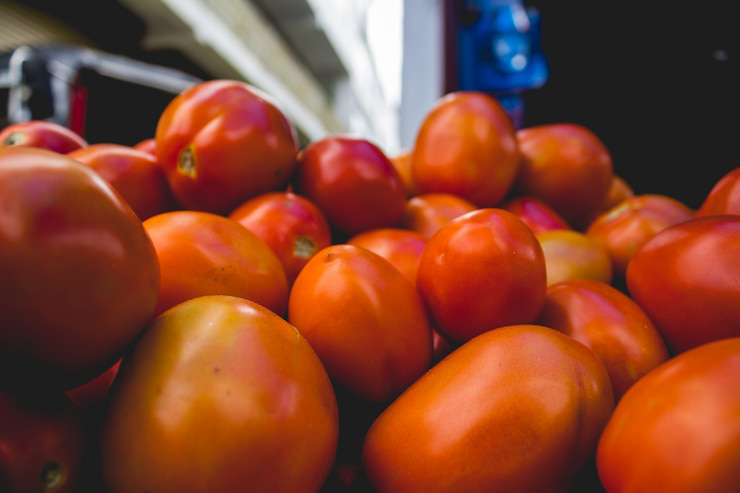

In [ ]:
img = load_image("https://img.freepik.com/free-photo/stacked-tomatoes_1353-262.jpg?w=740&t=st=1683821147~exp=1683821747~hmac=708f16371d1e158d76c8ea5e8b9790fb68dc75009750b8328e17c21f16d36468")
img

# Creating Text Prompts

  0%|          | 0/35 [00:00<?, ?it/s]

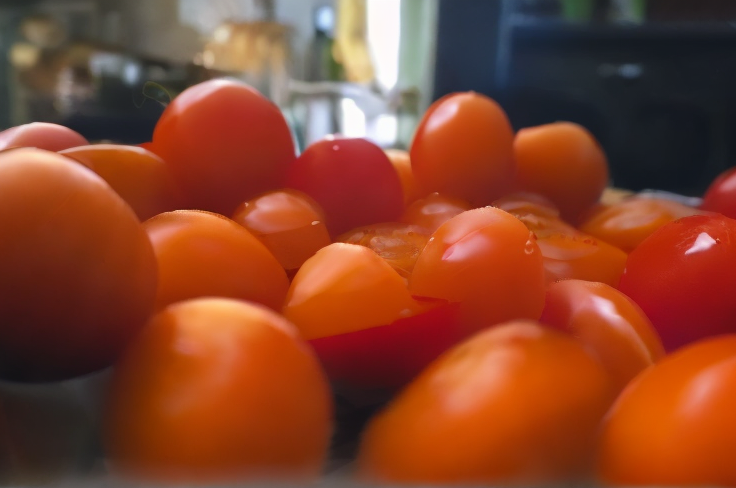

In [ ]:
prompt = "Some sliced tomatoes mixed"
pipe(prompt=prompt, image=img, negative_prompt=None, strength=0.7).images[0]

# Creating negative Prompts

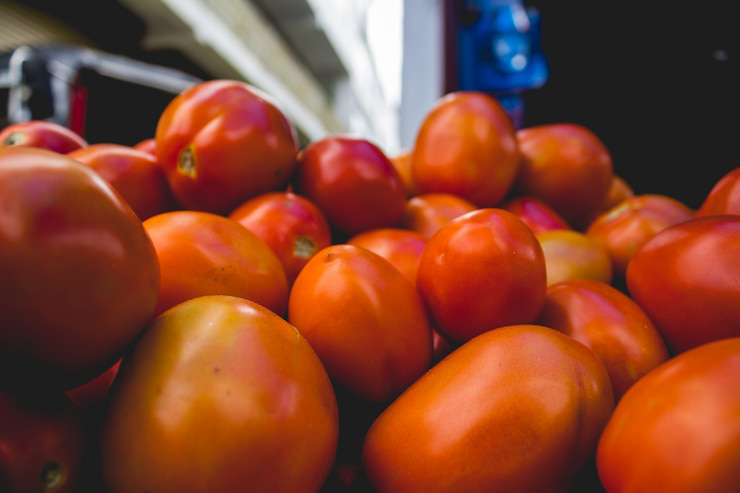

In [ ]:
img = load_image("https://img.freepik.com/free-photo/stacked-tomatoes_1353-262.jpg?w=740&t=st=1683821147~exp=1683821747~hmac=708f16371d1e158d76c8ea5e8b9790fb68dc75009750b8328e17c21f16d36468")
img

  0%|          | 0/35 [00:00<?, ?it/s]

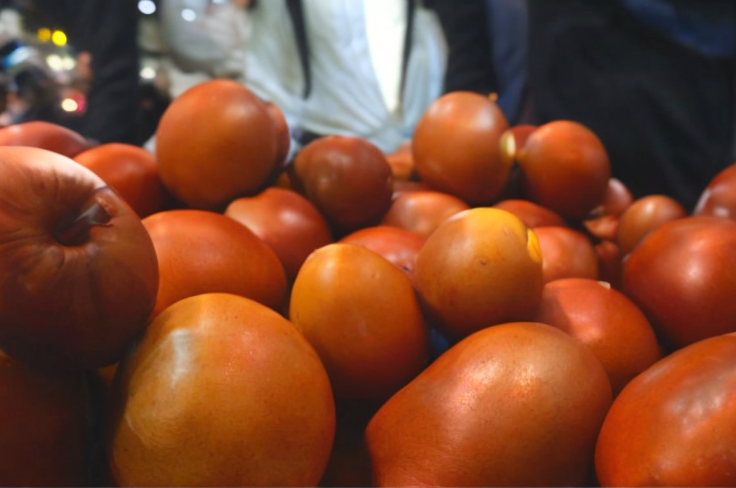

In [ ]:
prompt = ""
n_prompt = "rot, bad, decayed, wrinkled"
pipe(prompt=prompt, image=img, negative_prompt=n_prompt, strength=0.7).images[0]

# Adjusting diffusion level

At strength = 0.1

  0%|          | 0/5 [00:00<?, ?it/s]

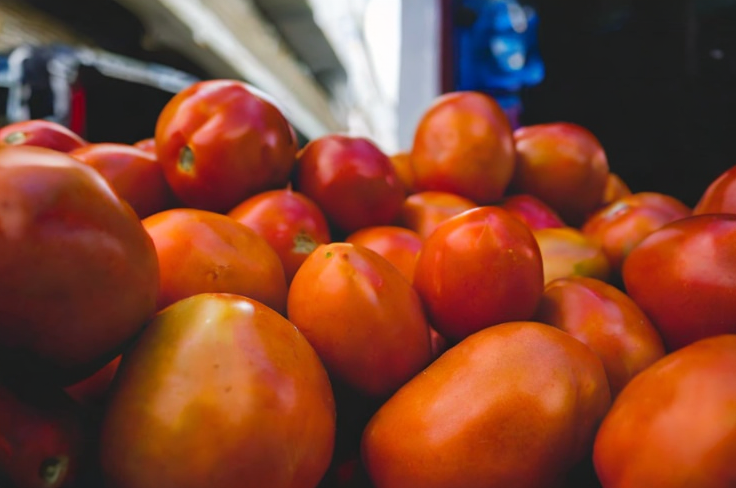

In [ ]:
prompt = ""
n_prompt = "rot, bad, decayed, wrinkled"
pipe(prompt=prompt, image=img, negative_prompt=n_prompt, strength=0.1).images[0]

At strength = 0.4

  0%|          | 0/20 [00:00<?, ?it/s]

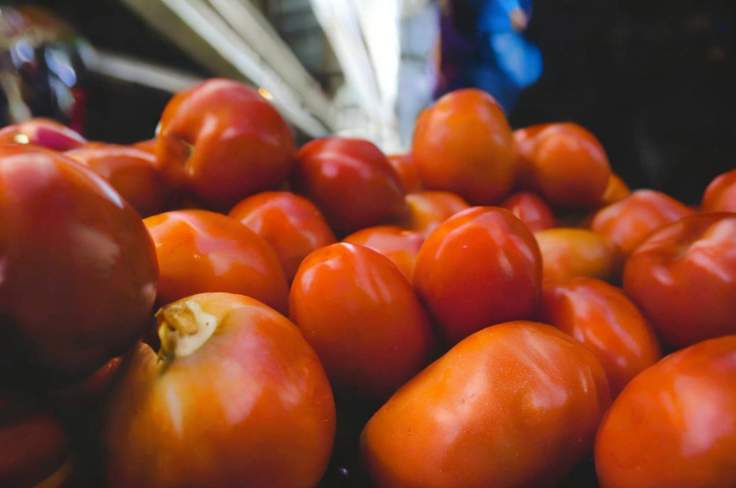

In [ ]:
prompt = ""
n_prompt = "rot, bad, decayed, wrinkled"
pipe(prompt=prompt, image=img, negative_prompt=n_prompt, strength=0.4).images[0]

At strength = 1.0

  0%|          | 0/50 [00:00<?, ?it/s]

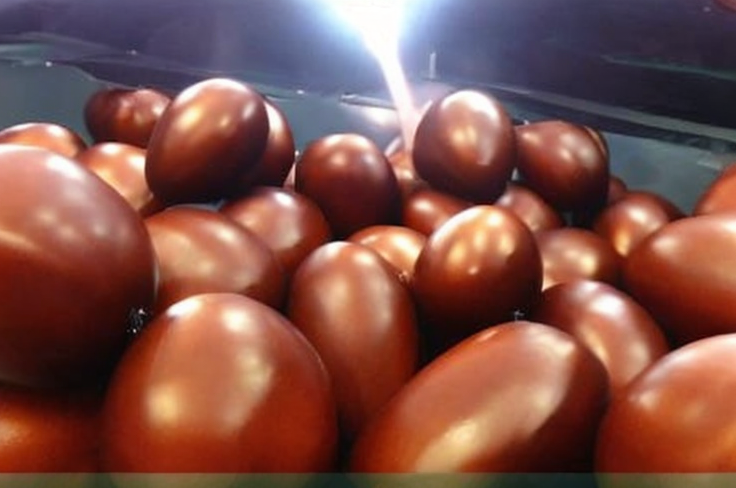

In [ ]:
prompt = ""
n_prompt = "rot, bad, decayed, wrinkled"
pipe(prompt=prompt, image=img, negative_prompt=n_prompt, strength=1.0).images[0]